In [2]:
#Shishir Khanal
# July 14, 2025
# Bag of Symbolic Fourier Approximation

In [4]:
# SFA is a symbolic representation of Time Series -> Transform into SFA words
#Acts as a Low Pass Filter
#Use string matching to access similarities
#Steps:
#1. DFT
#2. Quantization using Multiple Coefficient Binning (MCB)(approximate Step 1 coeff into words)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
#DFT
x = np.array([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1])
x_dft = np.fft.fft(x)

In [7]:
x_dft

array([ 8.10000000e+01+0.j        , -2.88652979e+01-5.39585933j,
        2.41264070e-01+0.0934662j , -2.83816557e+00-1.75731772j,
        2.12479910e-01+0.19370103j, -7.58287827e-01-1.00413536j,
        1.54155956e-01+0.30958689j, -1.88385685e-01-0.662107j  ,
        4.22370376e-02+0.45581023j,  4.22370376e-02-0.45581023j,
       -1.88385685e-01+0.662107j  ,  1.54155956e-01-0.30958689j,
       -7.58287827e-01+1.00413536j,  2.12479910e-01-0.19370103j,
       -2.83816557e+00+1.75731772j,  2.41264070e-01-0.0934662j ,
       -2.88652979e+01+5.39585933j])

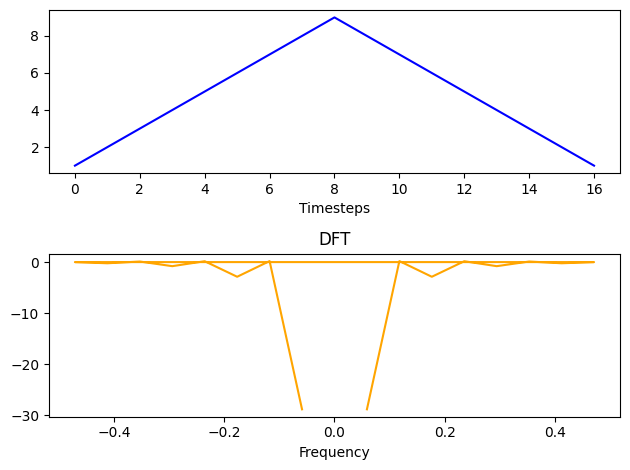

In [8]:
freq = np.fft.fftfreq(x.shape[-1])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.plot(x, color='blue')
ax1.set_xlabel('Timesteps')

ax2.plot(freq[1:], x_dft.real[1:],color='orange')
ax2.set_xlabel('Frequency')
ax2.set_title('DFT')

plt.tight_layout()

In [9]:
x = np.array([1.1,2.4,3.9,4.2])
x_dft = np.fft.fft(x)

x_dft

array([11.6+0.j , -2.8+1.8j, -1.6+0.j , -2.8-1.8j])

In [10]:
#Individual BOSS

In [13]:
from sktime.datasets import load_basic_motions

X_train,y_train = load_basic_motions(split='train', return_type='numpy3D')
X_test,y_test = load_basic_motions(split='test', return_type='numpy3D')

uni_X_train = X_train[:,0:1,:]
uni_X_test = X_test[:,0:1,:]

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score

from sktime.classification.dictionary_based import IndividualBOSS

#Init Model
boss = IndividualBOSS(n_jobs=-1, random_state=42)

#Define params to grid
params = {
    'window_size': [10,20,30],
    'word_length': [2,3,4],
    'alphabet_size': [2,3,4]
}

#Tune Model
tuned_boss = GridSearchCV(
    boss,
    params,
    cv=KFold(n_splits=4)
)

#Fit Model
tuned_boss.fit(uni_X_train,y_train)

#Make Predictions
y_pred = tuned_boss.predict(uni_X_test)

print(tuned_boss.best_params_)
print(accuracy_score(y_test, y_pred))


{'alphabet_size': 2, 'window_size': 10, 'word_length': 2}
0.575


In [16]:
#Boss Ensemble

In [18]:
import time
from sktime.classification.dictionary_based import BOSSEnsemble
#Build 500 models by default

start = time.time()

#Init Boss Ensemble
boss = BOSSEnsemble(n_jobs=-1, random_state=42)

#Params grid
params = {
    'alphabet_size': [2,3,4],
    'feature_selection': ['chi2','random']
}

tuned_boss = GridSearchCV(
    boss,
    params,
    cv=KFold(n_splits=4)
)

tuned_boss.fit(uni_X_train, y_train)

y_pred = tuned_boss.predict(uni_X_test)

end = time.time()

print(f"Elapsed time: {round(end-start,0)} seconds or {round((end-start)/60,0)} minutes")
print(tuned_boss.best_params_)
print(accuracy_score(y_test, y_pred))

Elapsed time: 281.0 seconds or 5.0 minutes
{'alphabet_size': 2, 'feature_selection': 'chi2'}
0.975


In [ ]:
#cnotractable BOSS

In [19]:
from sktime.classification.dictionary_based import ContractableBOSS

start = time.time()

#Intialize contractable BOSS
c_boss = ContractableBOSS(n_jobs=-1, random_state=42)

#Params grid
params = {
    'min_window': [5, 10, 20],
    'feature_selection': ['chi2','random']
}

tuned_boss = GridSearchCV(
    boss,
    params,
    cv=KFold(n_splits=4)
)

tuned_boss.fit(uni_X_train, y_train)
y_pred = tuned_boss.predict(uni_X_test)

end = time.time()

print(f"Elapsed time: {round(end-start,0)} seconds or {round((end-start)/60,0)} minutes")
print(tuned_boss.best_params_)
print(accuracy_score(y_test, y_pred))

Elapsed time: 300.0 seconds or 5.0 minutes
{'feature_selection': 'chi2', 'min_window': 5}
1.0
